In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



pd.set_option('display.max_rows',500)

import warnings
warnings.filterwarnings('ignore',category=FutureWarning)


In [2]:
df=pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
df.Department.nunique()

10

In [17]:
#average number for all coluns based on column name:left
df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,5.819041,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,6.035284,1.345842


In [9]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
le_Department=LabelEncoder()
le_salary=LabelEncoder()

In [12]:
df['Department']=le_Department.fit_transform(df['Department'])
df['salary']=le_salary.fit_transform(df['salary'])

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [14]:
df.Department.unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [16]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [15]:
df.salary.unique()

array([1, 2, 0])

In [18]:
#Plot bar charts showing impact of employee salaries on retention

pd.crosstab(df.salary,df.left)

left,0,1
salary,,
0,1155,82
1,5144,2172
2,5129,1317


<AxesSubplot:xlabel='salary'>

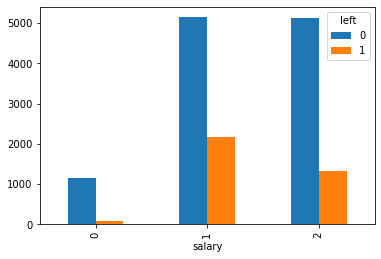

In [19]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [20]:
#Plot bar charts showing corelation between department and employee retention
pd.crosstab(df.Department,df.left)

left,0,1
Department,,
0,954,273
1,666,121
2,563,204
3,524,215
4,539,91
5,655,203
6,704,198
7,3126,1014
8,1674,555


<AxesSubplot:xlabel='Department'>

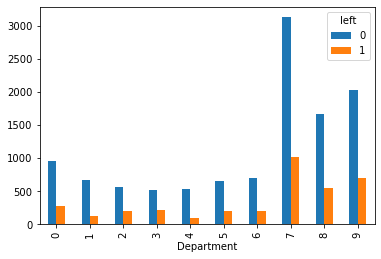

In [21]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [36]:
subdf=df[['satisfaction_level','average_montly_hours','promotion_last_5years','Work_accident','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident,salary
0,0.38,157,0,0,1
1,0.80,262,0,0,2
2,0.11,272,0,0,2
3,0.72,223,0,0,1
4,0.37,159,0,0,1


In [37]:
X=subdf.drop(["salary"],axis=1)

In [38]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident
0,0.38,157,0,0
1,0.80,262,0,0
2,0.11,272,0,0
3,0.72,223,0,0
4,0.37,159,0,0


In [39]:
y=df['salary']

In [40]:
y.head()

0    1
1    2
2    2
3    1
4    1
Name: salary, dtype: int32

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)

In [42]:
X_train.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident
10804,0.66,196,0,1
13984,0.93,272,0,0
7971,0.80,256,0,0
6177,0.72,255,0,0
10085,0.15,121,0,0


In [43]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident
0,0.38,157,0,0
1,0.80,262,0,0
2,0.11,272,0,0
3,0.72,223,0,0
4,0.37,159,0,0


In [44]:
sc_X= StandardScaler()
X_train=pd.DataFrame(sc_X.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(sc_X.transform(X_test),columns=X_test.columns)

In [45]:
X_train.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident
0,0.182687,-0.101478,-0.151338,2.411950
1,1.267904,1.422755,-0.151338,-0.414602
2,0.745392,1.101863,-0.151338,-0.414602
3,0.423847,1.081808,-0.151338,-0.414602
4,-1.867166,-1.605655,-0.151338,-0.414602


In [46]:
logr=LogisticRegression()

In [47]:
logr.fit(X_train,y_train)

LogisticRegression()

In [48]:
logr.score(X_test,y_test)

0.49474747474747477

In [49]:

logr.score(X_train,y_train)

0.49676584734799484

In [34]:
#without work accident- 0.497373
logr.score(X_test,y_test)

0.49737373737373736

In [35]:
#without work accident- 0.4940790
logr.score(X_train,y_train)

0.4940790128370982